<a href="https://colab.research.google.com/github/beatrizmaiads/deep-learning-projects/blob/master/deep_learning_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning - Keras-Tensorflow**

In [ ]:
# importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model

In [ ]:
# carregando o dataset
dados = keras.datasets.fashion_mnist
((img_treino, labels_treino), (img_teste, labels_teste)) = dados.load_data()

## Conhecendo melhor os nosso dados

In [ ]:
img_treino.shape

(60000, 28, 28)

In [ ]:
img_teste.shape

(10000, 28, 28)

In [ ]:
print(f'Min id: {labels_treino.min()}')
print(f'Max id: {labels_treino.max()}')

Min id: 0
Max id: 9


In [ ]:
total_de_labels = 10
nomes_labels = ['Camiseta', 'Calça', 'Pullover', 
                'Vestido', 'Casaco', 'Sandália', 'Camisa',
                'Tênis', 'Bolsa', 'Bota'] #informação retirada do https://github.com/zalandoresearch/fashion-mnist

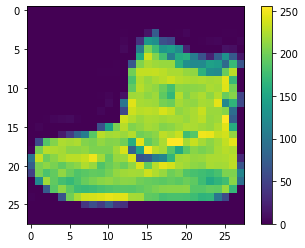

In [ ]:
# visualizando nossas imagens
plt.imshow(img_treino[0])
plt.colorbar()
plt.show()

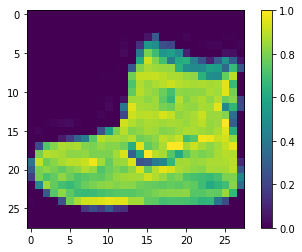

In [ ]:
# normalizando as imagens
img_treino = img_treino / float(255)

plt.imshow(img_treino[0])
plt.colorbar()
plt.show()

## Criando, compilando, treinando e normalizando o modelo

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #entrada
    keras.layers.Dense(256, activation=tensorflow.nn.relu), #camada oculta
    keras.layers.Dropout(0.2), #camada oculta
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) #saída
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(img_treino, labels_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5312 - accuracy: 0.8112 - val_loss: 0.4082 - val_accuracy: 0.8521
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3991 - accuracy: 0.8547 - val_loss: 0.3810 - val_accuracy: 0.8587
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3644 - accuracy: 0.8654 - val_loss: 0.3516 - val_accuracy: 0.8725
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3423 - accuracy: 0.8743 - val_loss: 0.3402 - val_accuracy: 0.8753
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3239 - accuracy: 0.8807 - val_loss: 0.3430 - val_accuracy: 0.8786


In [ ]:
# salvando o modelo treinado
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

**Visualizando as acurácias de treino e validação por época** 

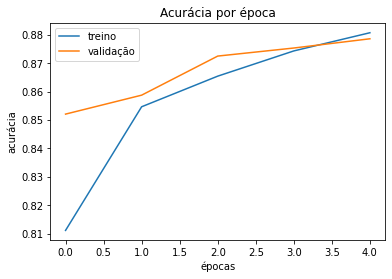

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])
plt.show()

**Visualizando as perdas de treino e validação por época**  

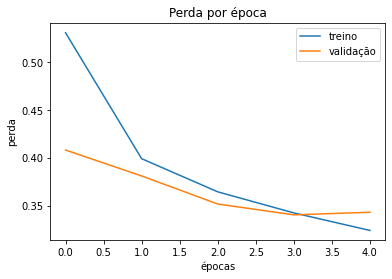

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])
plt.show()

**Testando o modelo e o modelo salvo**  

In [ ]:
teste = modelo.predict(img_teste)
print(f'Resultado do teste: {np.argmax(teste[0])}')
print(f'Número da imagem do teste: {labels_teste[0]}')

Resultado do teste: 9
Número da imagem do teste: 9


In [ ]:
teste_modelo_salvo = modelo_salvo.predict(img_teste)
print(f'Resultado do teste: {np.argmax(teste_modelo_salvo[0])}')
print(f'Número da imagem do teste: {labels_teste[0]}')

Resultado do teste: 9
Número da imagem do teste: 9


**Avaliando o modelo** 

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(img_teste, labels_teste)
print(f'Perda teste: {perda_teste}')
print(f'Acurácia teste: {acuracia_teste}')

313/313 [==============================] - 0s 2ms/step - loss: 50.4810 - accuracy: 0.8624
Perda teste: 50.481048583984375
Acurácia teste: 0.8623999953269958


Materiais de apoio: https://cursos.alura.com.br/course/deep-learning-introducao-com-keras